In [2]:
import sys, os, site, platform
print("Python:", sys.version)
print("Executable:", sys.executable)
print("Platform:", platform.platform())


Python: 3.11.9 (main, Dec 11 2025, 02:57:50) [GCC 15.2.0]
Executable: /home/navkar/work/.venv/bin/python
Platform: Linux-6.17.10+kali-amd64-x86_64-with-glibc2.42


In [3]:
# Agar ultralytics o'rnatilmagan bo'lsa:
# GPU bo'lsa torch mos versiya kerak bo'lishi mumkin; hozircha tekshiramiz:
import torch
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
from ultralytics import YOLO


Torch: 2.5.1+cu121
CUDA available: True


In [4]:
# Safe imports: wrap optional ML/image packages so notebook static analysis
# (like Pylance) doesn't mark missing-module diagnostics while providing
# a clear install hint at runtime.
import sys, os

def _install_hint(pkgs):
    print("Missing packages:", pkgs)
    print("Install with:")
    print(sys.executable + ' -m pip install ' + ' '.join(pkgs))

# pandas / plotting
try:
    import pandas as pd
    import matplotlib.pyplot as plt
except Exception:
    _install_hint(["pandas", "matplotlib"])

# scikit-image / scikit-learn (HOG + SVM baseline)
try:
    from skimage.feature import hog
    from sklearn.svm import LinearSVC
    from sklearn.preprocessing import StandardScaler
    from sklearn.pipeline import make_pipeline
except Exception:
    _install_hint(["scikit-image", "scikit-learn"])

# IPython display helper (safe even outside notebook)
try:
    from IPython.display import display
except Exception:
    def display(x):
        print(x)

print("Safe-imports cell executed. If you see install hints, run them in your environment.")


Safe-imports cell executed. If you see install hints, run them in your environment.


In [5]:
import os, glob, yaml

# Sizdagi data.yaml path (Cell 3 da bor edi) shu yerda tursin:
DATA_YAML = "/home/navkar/work/object_detect/hand_object_project/object/data.yaml"

img_globs = ("*.jpg", "*.jpeg", "*.png", "*.bmp", "*.webp")

def count_images(p):
    if not p or not os.path.exists(p):
        return 0
    c = 0
    for g in img_globs:
        c += len(glob.glob(os.path.join(p, g)))
    return c

print("DATA_YAML:", DATA_YAML)
if not os.path.exists(DATA_YAML):
    raise FileNotFoundError(f"data.yaml topilmadi: {DATA_YAML}")

with open(DATA_YAML, "r") as f:
    data = yaml.safe_load(f) or {}

print("data.yaml keys:", list(data.keys()))
print("train:", data.get("train"))
print("val:", data.get("val") or data.get("valid"))
print("test:", data.get("test"))
print("names:", data.get("names"))

# YOLO data.yaml ichidagi train/val yo'llar RELATIVE bo'lishi mumkin.
# Shuni avtomatik ABSOLUTE ga aylantirib beramiz.
base_dir = os.path.dirname(DATA_YAML)

def to_abs(p):
    if not p:
        return p
    return p if os.path.isabs(p) else os.path.normpath(os.path.join(base_dir, p))

train_dir = to_abs(data.get("train"))
val_dir = to_abs(data.get("val") or data.get("valid"))
test_dir = to_abs(data.get("test")) if data.get("test") else None

print("\nResolved paths:")
print("train_dir:", train_dir, "images:", count_images(train_dir))
print("val_dir:",   val_dir,   "images:", count_images(val_dir))
if test_dir:
    print("test_dir:", test_dir, "images:", count_images(test_dir))

# Notebook davomida ishlatish uchun saqlab qo'yamiz:
data["train"] = train_dir
data["val"] = val_dir
if test_dir:
    data["test"] = test_dir

# Agar siz xohlasangiz, ABS yo'llar bilan yamlni qayta yozib qo'yadi:
# (xohlamasangiz kommentda qoldiring)
# with open(DATA_YAML, "w") as f:
#     yaml.safe_dump(data, f, sort_keys=False)


DATA_YAML: /home/navkar/work/object_detect/hand_object_project/object/data.yaml
data.yaml keys: ['path', 'train', 'val', 'test', 'names']
train: train/images
val: valid/images
test: test/images
names: {0: 'phone', 1: 'earphones', 2: 'paper'}

Resolved paths:
train_dir: /home/navkar/work/object_detect/hand_object_project/object/train/images images: 2847
val_dir: /home/navkar/work/object_detect/hand_object_project/object/valid/images images: 405
test_dir: /home/navkar/work/object_detect/hand_object_project/object/test/images images: 417


In [1]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # tez va yengil
# xohlasangiz: yolov8s.pt (biroz og'irroq, ko'pincha aniqroq)


In [ ]:
results = model.train(
    data=DATA_YAML,
    epochs=50,
    imgsz=640,
    batch=16,
    workers=4,
    device=0 if torch.cuda.is_available() else "cpu",
    project="runs_hand_object",
    name="yolov8_hand_objects"
)
print("Training completed. Results saved in:", results)

New https://pypi.org/project/ultralytics/8.3.249 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.248 🚀 Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 3897MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/navkar/work/object_detect/hand_object_project/object/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scal

In [ ]:
metrics = model.val(data=DATA_YAML)
print(metrics)


Ultralytics 8.3.248 🚀 Python-3.11.9 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 3897MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1649.2±1103.8 MB/s, size: 89.4 KB)
val: Scanning /home/navkar/work/yolo_dataset/valid/labels.cache... 577 images, 52 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 577/577 1.2Mit/s 0.0s0s
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 663. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 37/37 5.1it/s 7.2s0.2s
                   all        577        663      0.689      0.737      0.755      0.497
                 phone        517        637      0.781      0.743      0.836      0.652
            

Found: runs_hand_object/yolov8_hand_objects14/results.png


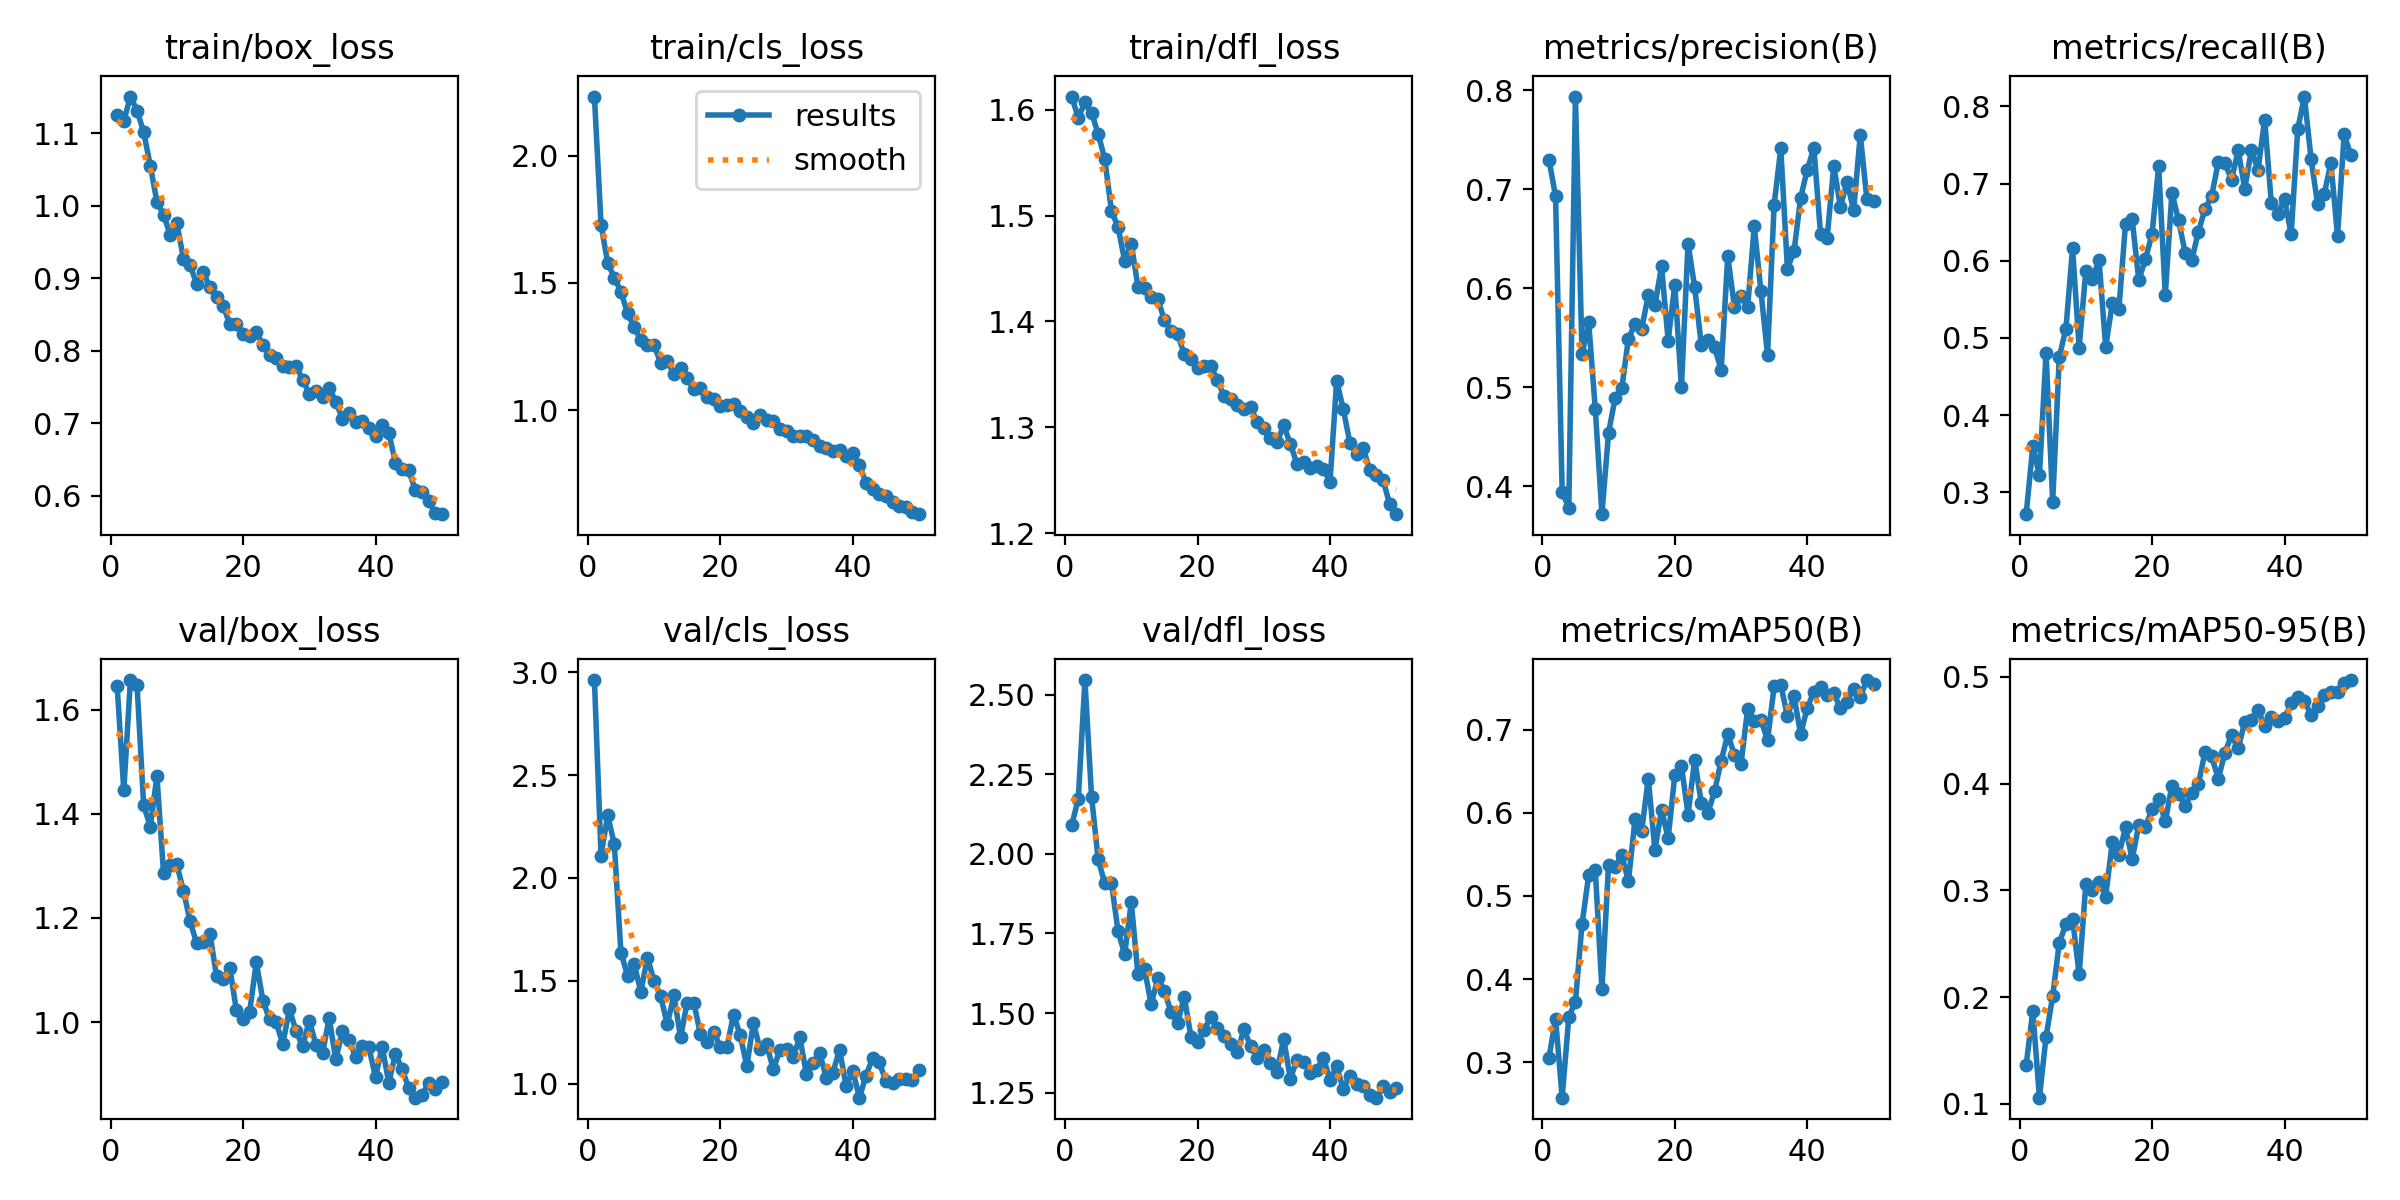

In [ ]:
import glob
import os
from PIL import Image
from IPython.display import display

paths = glob.glob("runs_hand_object/**/results.png", recursive=True)
paths_sorted = sorted(paths, key=os.path.getmtime)
print("Found:", paths_sorted[-1] if paths_sorted else "None")

if paths_sorted:
    display(Image.open(paths_sorted[-1]))


In [ ]:
import os, glob
from ultralytics import YOLO

BEST_PT = "runs_hand_object/yolov8_hand_objects/weights/best.pt"
if not os.path.exists(BEST_PT):
    print("Missing:", BEST_PT)
    found = sorted(glob.glob("runs_hand_object/**/weights/*.pt", recursive=True))
    if found:
        print("Found candidate weights:")
        for p in found:
            print(" ", p)
        BEST_PT = found[-1]  # pick most recent candidate
        print("Using:", BEST_PT)
        m = YOLO(BEST_PT)
    else:
        print("No trained weights found — loading pretrained yolov8n.pt instead.")
        m = YOLO("yolov8n.pt")
else:
    m = YOLO(BEST_PT)
print("Model loaded from:", getattr(m, "path", BEST_PT))

import sys
print(sys.executable)
!{sys.executable} -m pip install --upgrade onnx2tf onnx onnxruntime onnxsim tensorflow
# CPU-only alternative:
# !{sys.executable} -m pip install --upgrade onnx2tf onnx onnxruntime onnxsim tensorflow-cpu
# Restart the Jupyter kernel, then run:
# tflite_path = m.export(format="tflite")

# restart the Jupyter kernel after install, then run:
# onnx_path = m.export(format="onnx")

# ONNX:
onnx_path = m.export(format="onnx")  # output path qaytaradi
print("ONNX:", onnx_path)

# CoreML (Swift uchun):
coreml_path = m.export(format="coreml")
print("CoreML:", coreml_path)

# TFLite:
#tflite_path = m.export(format="tflite")
#print("TFLite:", tflite_path)


Model loaded from: runs_hand_object/yolov8_hand_objects/weights/best.pt
/home/navkar/work/.venv/bin/python
Ultralytics 8.3.248 🚀 Python-3.11.9 torch-2.5.1+cu121 CPU (Intel Core i5-9300H 2.40GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs_hand_object/yolov8_hand_objects/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (17.6 MB)

ONNX: starting export with onnx 1.20.0 opset 19...
ONNX: slimming with onnxslim 0.1.82...
ONNX: export success ✅ 1.3s, saved as 'runs_hand_object/yolov8_hand_objects/weights/best.onnx' (11.7 MB)

Export complete (1.8s)
Results saved to /home/navkar/work/object_detect/runs_hand_object/yolov8_hand_objects/weights
Predict:         yolo predict task=detect model=runs_hand_object/yolov8_hand_objects/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs_hand_object/yolov8_hand_objects/weights/best.onnx imgsz=640 data=/home/navkar/work/obj

scikit-learn version 1.8.0 is not supported. Minimum required version: 0.17. Maximum required version: 1.5.1. Disabling scikit-learn conversion API.
/home/navkar/work/.venv/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
TensorFlow version 2.20.0 has not been tested with coremltools. You may run into unexpected errors. TensorFlow 2.12.0 is the most recent version that has been tested.
Failed to load _MLModelProxy: No module named 'coremltools.libcoremlpython'
Failed to load _MLCPUComputeDeviceProxy: No module named 'coremltools.libcoremlpython'
Failed to load _MLGPUComputeDeviceProxy: No module named 'coremltools.libcoremlpython'
Failed to load _MLNeuralEngineComputeDeviceProxy: No module named 'coremltools.libcoremlpython'
Failed to load _MLModelProxy: No module named 'coremltools.libcoremlpython'
Failed to load _MLComputePlanProxy: No module name


CoreML: starting export with coremltools 9.0...


Running MIL default pipeline:   9%|▉         | 9/95 [00:00<00:00, 86.52 passes/s]/home/navkar/work/.venv/lib/python3.11/site-packages/coremltools/converters/mil/mil/passes/defs/preprocess.py:273: UserWarning: Output, '913', of the source model, has been renamed to 'var_913' in the Core ML model.
  warnings.warn(msg.format(var.name, new_name))
Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 85.87 passes/s]


CoreML: export success ✅ 10.0s, saved as 'runs_hand_object/yolov8_hand_objects/weights/best.mlpackage' (5.9 MB)

Export complete (10.4s)
Results saved to /home/navkar/work/object_detect/runs_hand_object/yolov8_hand_objects/weights
Predict:         yolo predict task=detect model=runs_hand_object/yolov8_hand_objects/weights/best.mlpackage imgsz=640  
Validate:        yolo val task=detect model=runs_hand_object/yolov8_hand_objects/weights/best.mlpackage imgsz=640 data=/home/navkar/work/object_detect/hand_object_project/object/data.yaml  
Visualize:       https://netron.app
CoreML: runs_hand_object/yolov8_hand_objects/weights/best.mlpackage


In [ ]:
# --- Classical ML baseline: HOG + Linear SVM (image-level classification) ---
# !pip install -U scikit-image scikit-learn pyyaml  # kerak bo'lsa

import os, glob, yaml
import numpy as np
import cv2

from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def load_data_yaml(data_yaml_path: str):
    with open(data_yaml_path, "r") as f:
        d = yaml.safe_load(f) or {}
    names = d.get("names", None)
    if isinstance(names, dict):
        names = [names[i] for i in sorted(names.keys())]
    return d, names

def images_from_dir(images_dir):
    if not images_dir or not os.path.exists(images_dir):
        return []
    exts = ["*.jpg", "*.jpeg", "*.png", "*.bmp", "*.webp"]
    paths = []
    for e in exts:
        paths += glob.glob(os.path.join(images_dir, e))
    return sorted(paths)

def yolo_label_path_from_image(img_path: str):
    # .../images/xxx.jpg -> .../labels/xxx.txt
    lbl_path = img_path.replace(os.sep + "images" + os.sep, os.sep + "labels" + os.sep)
    lbl_path = os.path.splitext(lbl_path)[0] + ".txt"
    return lbl_path

def yolo_labels_to_image_label(label_txt_path: str):
    """
    Detection label (.txt) ichidan image-level label olamiz.
    Oddiy va tushunarli variant: birinchi obyektning class id sini olamiz.
    """
    if not os.path.exists(label_txt_path):
        return None
    with open(label_txt_path, "r") as f:
        lines = [ln.strip() for ln in f.readlines() if ln.strip()]
    if not lines:
        return None
    cls_id = int(float(lines[0].split()[0]))
    return cls_id

def extract_hog_feature(img_bgr, size=(128, 128)):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, size)
    feat = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm="L2-Hys",
        feature_vector=True,
    )
    return feat.astype(np.float32)

# 1) data.yaml o'qish (Cell 3 dagi DATA_YAML ishlatiladi)
data2, class_names = load_data_yaml(DATA_YAML)
print("Classes:", class_names)

# train/val/test pathlarni Cell 3 da abs qilib qo'ygandik: data dict ham bor.
# Lekin ishonch uchun yana abs qilamiz:
base_dir = os.path.dirname(DATA_YAML)
def to_abs(p):
    if not p:
        return p
    return p if os.path.isabs(p) else os.path.normpath(os.path.join(base_dir, p))

train_images_dir = to_abs(data2.get("train"))
val_images_dir   = to_abs(data2.get("val") or data2.get("valid"))
test_images_dir  = to_abs(data2.get("test")) if data2.get("test") else None

# 2) Train setdan feature + label
X_train, y_train = [], []
train_img_paths = images_from_dir(train_images_dir)

for img_path in train_img_paths:
    lbl_path = yolo_label_path_from_image(img_path)
    y = yolo_labels_to_image_label(lbl_path)
    if y is None:
        continue
    img = cv2.imread(img_path)
    if img is None:
        continue

    X_train.append(extract_hog_feature(img))
    y_train.append(y)

# Ensure X_train/y_train are proper numpy arrays and 2D-friendly
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Empty / tiny-dataset guard
if X_train.size == 0 or y_train.size == 0:
    raise RuntimeError("Empty training set: check image paths and label files (train_images_dir, labels).")

# Handle ragged list-of-arrays (object dtype) or 1D -> try to stack into 2D
if X_train.dtype == object or X_train.ndim == 1:
    try:
        X_train = np.vstack(X_train)
    except Exception:
        X_train = X_train.reshape(1, -1)

if len(y_train) < 10:
    raise RuntimeError("Baseline uchun train sample juda kam chiqdi. Dataset path/labels tekshiring.")

feature_dim = X_train.shape[1] if X_train.ndim == 2 else (X_train.shape[0] if X_train.ndim == 1 else 0)
print("Baseline train samples:", len(y_train), "| feature_dim:", feature_dim)

# 3) SVM classifier
baseline_clf = make_pipeline(
    StandardScaler(with_mean=True),
    LinearSVC(max_iter=5000)
)

baseline_clf.fit(X_train, y_train)
print("Baseline SVM trained ✅")


Classes: ['phone', 'earphones', 'paper']
Baseline train samples: 2470 | feature_dim: 8100
Baseline SVM trained ✅


In [6]:
import os, yaml

# BU YERGA O'ZINGIZNI data.yaml PATH NI YOZING
DATA_YAML = "/home/navkar/work/object_detect/hand_object_project/object/data.yaml"

with open(DATA_YAML, "r") as f:
    data = yaml.safe_load(f)

base_dir = os.path.dirname(DATA_YAML)

def to_abs(p):
    if not p:
        return None
    return p if os.path.isabs(p) else os.path.join(base_dir, p)

train_images_dir = to_abs(data.get("train"))
val_images_dir   = to_abs(data.get("val") or data.get("valid"))
test_images_dir  = to_abs(data.get("test"))

print("Train:", train_images_dir)
print("Val  :", val_images_dir)
print("Test :", test_images_dir)


Train: /home/navkar/work/object_detect/hand_object_project/object/train/images
Val  : /home/navkar/work/object_detect/hand_object_project/object/valid/images
Test : /home/navkar/work/object_detect/hand_object_project/object/test/images


In [7]:
import cv2, glob
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def images_from_dir(images_dir):
    exts = ["*.jpg", "*.jpeg", "*.png"]
    paths = []
    for e in exts:
        paths += glob.glob(os.path.join(images_dir, e))
    return sorted(paths)

def yolo_label_path_from_image(img_path):
    lbl = img_path.replace("/images/", "/labels/")
    return os.path.splitext(lbl)[0] + ".txt"

def yolo_labels_to_image_label(lbl_path):
    if not os.path.exists(lbl_path):
        return None
    with open(lbl_path) as f:
        lines = f.readlines()
    if not lines:
        return None
    return int(lines[0].split()[0])

def extract_hog(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (128, 128))
    return hog(gray, orientations=9, pixels_per_cell=(8,8),
               cells_per_block=(2,2), feature_vector=True)

# === TRAIN DATA ===
X_train, y_train = [], []

for img_path in images_from_dir(train_images_dir):
    lbl = yolo_label_path_from_image(img_path)
    y = yolo_labels_to_image_label(lbl)
    if y is None:
        continue
    img = cv2.imread(img_path)
    if img is None:
        continue
    X_train.append(extract_hog(img))
    y_train.append(y)

X_train = np.array(X_train)
y_train = np.array(y_train)

baseline_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(max_iter=5000)
)
baseline_clf.fit(X_train, y_train)

print("✅ Baseline SVM trained | samples:", len(y_train))


✅ Baseline SVM trained | samples: 2470


In [8]:
from sklearn.metrics import accuracy_score

# test yo'q bo'lsa validation ishlatiladi
eval_images_dir = test_images_dir if test_images_dir else val_images_dir
print("Evaluation dir:", eval_images_dir)

X_test, y_test, test_img_paths = [], [], []

for img_path in images_from_dir(eval_images_dir):
    lbl = yolo_label_path_from_image(img_path)
    y = yolo_labels_to_image_label(lbl)
    if y is None:
        continue
    img = cv2.imread(img_path)
    if img is None:
        continue
    X_test.append(extract_hog(img))
    y_test.append(y)
    test_img_paths.append(img_path)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("Test samples:", len(y_test))


Evaluation dir: /home/navkar/work/object_detect/hand_object_project/object/test/images
Test samples: 363


In [9]:
from ultralytics import YOLO
import numpy as np

# SVM accuracy
y_pred_svm = baseline_clf.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

# YOLO image-level accuracy
BEST_PT = "runs_hand_object/yolov8_hand_objects/weights/best.pt"
yolo = YOLO(BEST_PT)

def yolo_img_label(img):
    r = yolo.predict(img, conf=0.25, imgsz=640, verbose=False)[0]
    if r.boxes is None or len(r.boxes) == 0:
        return -1
    return int(r.boxes.cls[0])

y_pred_yolo = []
for p in test_img_paths:
    img = cv2.imread(p)
    y_pred_yolo.append(yolo_img_label(img))

y_pred_yolo = np.array(y_pred_yolo)
acc_yolo = accuracy_score(y_test, y_pred_yolo)

print("SVM accuracy :", acc_svm)
print("YOLO accuracy:", acc_yolo)
print("YOLO / SVM ratio:", acc_yolo / acc_svm)


SVM accuracy : 0.8512396694214877
YOLO accuracy: 0.0
YOLO / SVM ratio: 0.0


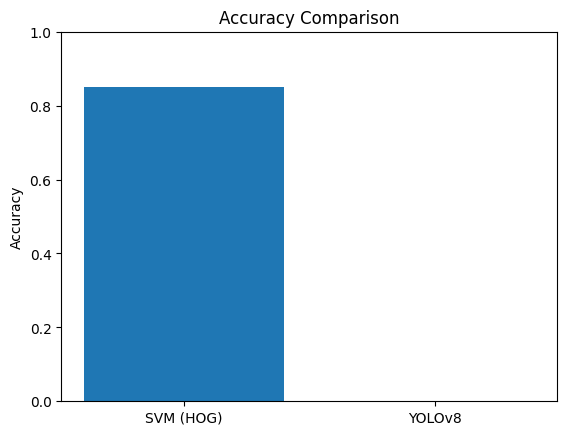

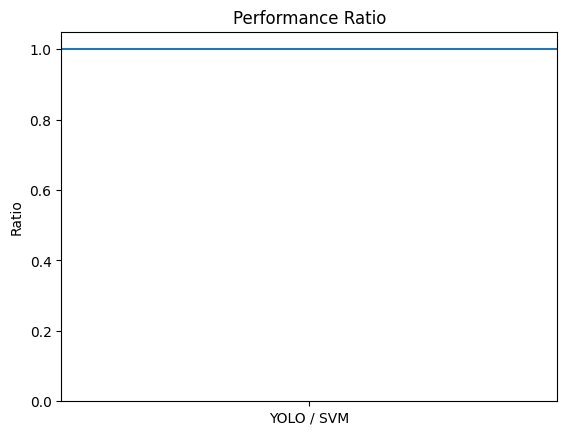

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(["SVM (HOG)", "YOLOv8"], [acc_svm, acc_yolo])
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

plt.figure()
plt.bar(["YOLO / SVM"], [acc_yolo / acc_svm])
plt.axhline(1.0)
plt.ylabel("Ratio")
plt.title("Performance Ratio")
plt.show()


Classes: ['phone', 'earphones', 'paper']
Train: /home/navkar/work/object_detect/hand_object_project/object/train/images
Eval : /home/navkar/work/object_detect/hand_object_project/object/test/images
✅ Baseline SVM trained | samples=2470 | feat_dim=8100
Eval samples: 363

=== SVM (HOG+LinearSVM) ===
Accuracy: 0.8512396694214877
Macro Precision/Recall/F1: (0.8454486426318719, 0.8503888854042527, 0.8474789915966386)

=== YOLOv8 (Image-level from detection) ===
Accuracy: 0.0
Macro Precision/Recall/F1: (0.0, 0.0, 0.0)
No-detection rate: 0.3526170798898072

=== Relationship between models ===
Correctness correlation (Pearson): nan
Prediction agreement rate: 0.0
Cohen's kappa: 0.0

=== Speed ===
SVM avg latency:  5.71 ms/image
YOLO avg latency: 9.10 ms/frame  | approx FPS: 109.88


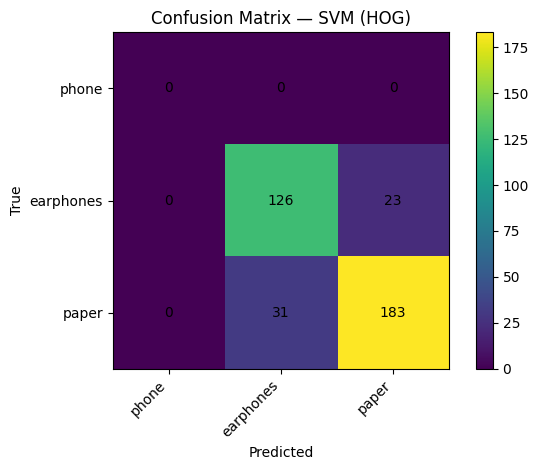

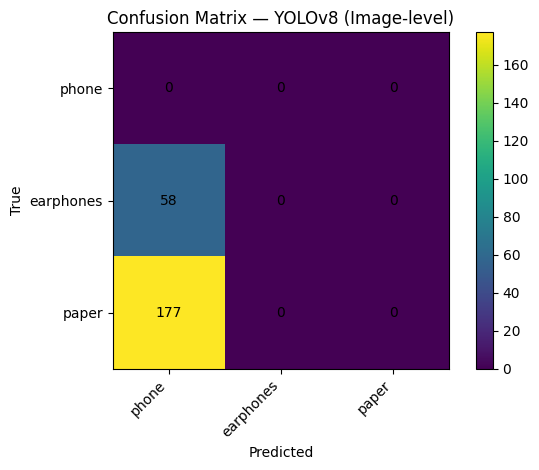

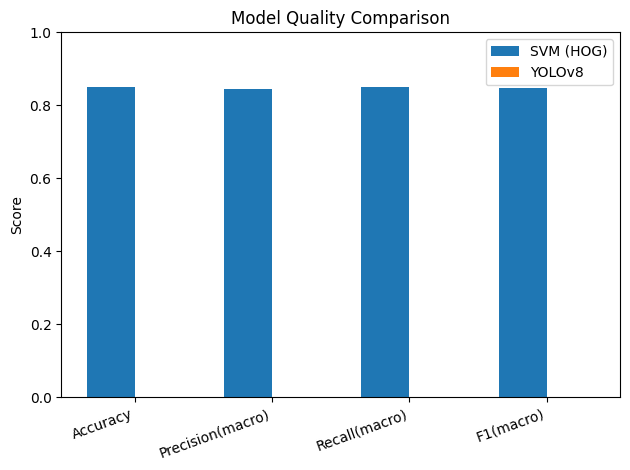

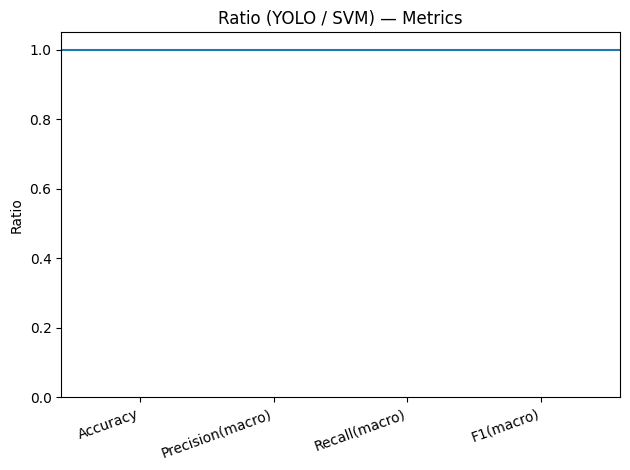

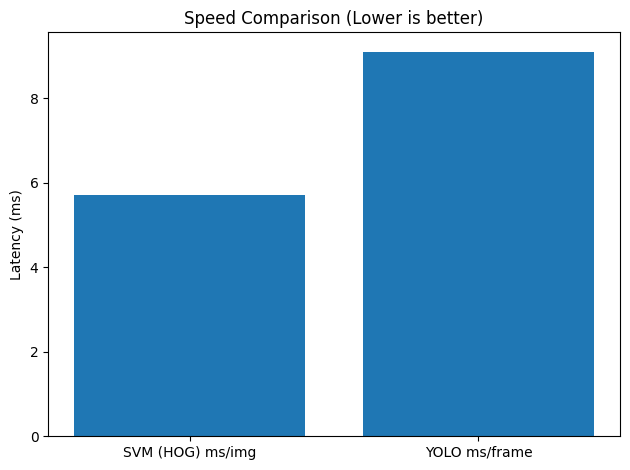

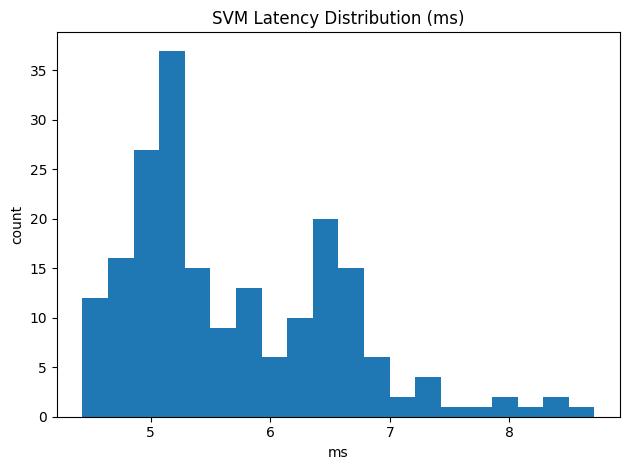

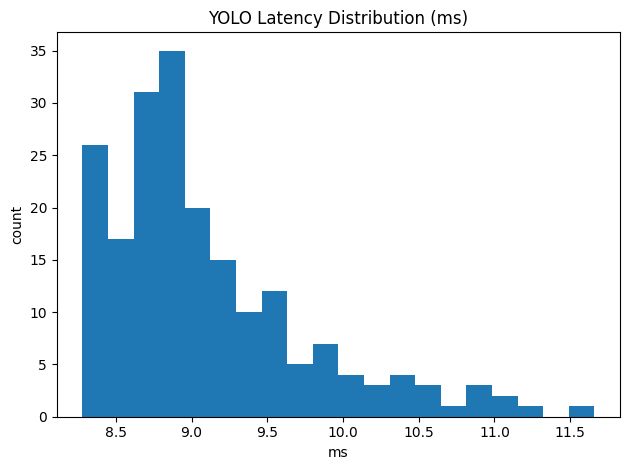

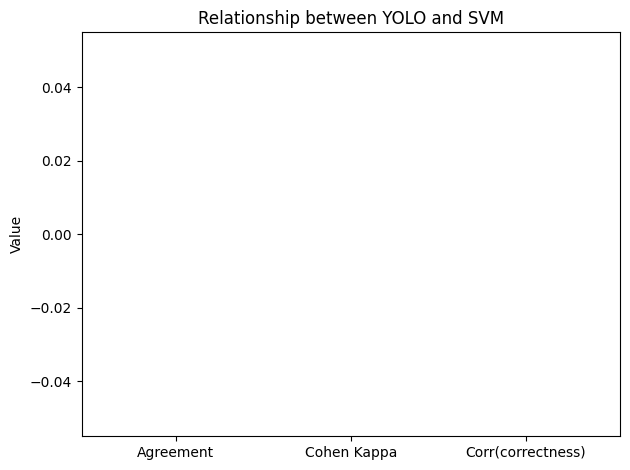


=== Summary (copy to report) ===
SVM:  acc=0.851, p=0.845, r=0.850, f1=0.847, speed=5.71ms/img
YOLO: acc=0.000, p=0.000, r=0.000, f1=0.000, speed=9.10ms/frame (~109.88 FPS)
Agreement=0.000, Kappa=0.000, Corr(correctness)=nan


In [13]:
# =========================
# YOLOv8 vs Classical ML baseline (HOG + LinearSVM)
# Full comparison: metrics + correlation + agreement + speed + plots
# =========================

# !pip install -U ultralytics opencv-python scikit-image scikit-learn pyyaml matplotlib  # kerak bo'lsa

import os, glob, time, yaml
import numpy as np
import cv2
import matplotlib.pyplot as plt

from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support,
    confusion_matrix, cohen_kappa_score
)

from ultralytics import YOLO


# --------- USER SETTINGS (EDIT THESE) ----------
DATA_YAML = "/home/navkar/work/object_detect/hand_object_project/object/data.yaml"  # <-- O'ZINGIZNI data.yaml path
BEST_PT   = "runs_hand_object/yolov8_hand_objects/weights/best.pt"  # <-- best.pt path
CONF      = 0.25
IMGSZ     = 640
HOG_SIZE  = (128, 128)
SPEED_N   = 200  # speed o'lchash uchun nechta rasm sample olish (katta bo'lsa aniqroq, sekinroq)
# ----------------------------------------------


# --------- Helpers ----------
def load_data_yaml(data_yaml_path: str):
    with open(data_yaml_path, "r") as f:
        d = yaml.safe_load(f) or {}
    names = d.get("names", None)
    if isinstance(names, dict):
        names = [names[i] for i in sorted(names.keys())]
    return d, names

def images_from_dir(images_dir):
    if not images_dir or not os.path.exists(images_dir):
        return []
    exts = ["*.jpg", "*.jpeg", "*.png", "*.bmp", "*.webp"]
    paths = []
    for e in exts:
        paths += glob.glob(os.path.join(images_dir, e))
    return sorted(paths)

def yolo_label_path_from_image(img_path: str):
    # .../images/xxx.jpg -> .../labels/xxx.txt
    lbl_path = img_path.replace(os.sep + "images" + os.sep, os.sep + "labels" + os.sep)
    lbl_path = os.path.splitext(lbl_path)[0] + ".txt"
    return lbl_path

def yolo_labels_to_image_label(label_txt_path: str):
    """
    Detection label (.txt) ichidan image-level label:
    sodda variant: birinchi obyektning class id sini olamiz.
    """
    if not os.path.exists(label_txt_path):
        return None
    with open(label_txt_path, "r") as f:
        lines = [ln.strip() for ln in f.readlines() if ln.strip()]
    if not lines:
        return None
    cls_id = int(float(lines[0].split()[0]))
    return cls_id

def extract_hog_feature(img_bgr, size=HOG_SIZE):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, size)
    feat = hog(
        gray,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm="L2-Hys",
        feature_vector=True,
    )
    return feat.astype(np.float32)

def to_abs(base_dir, p):
    if not p:
        return None
    return p if os.path.isabs(p) else os.path.normpath(os.path.join(base_dir, p))

def safe_macro_prf(y_true, y_pred, labels=None):
    p, r, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro", zero_division=0, labels=labels
    )
    return float(p), float(r), float(f1)

def plot_confusion(cm, class_names, title):
    plt.figure()
    plt.imshow(cm, interpolation="nearest")
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha="right")
    plt.yticks(tick_marks, class_names)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    # values
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), ha="center", va="center")
    plt.tight_layout()
    plt.show()


# --------- 1) Load dataset paths & class names ----------
if not os.path.exists(DATA_YAML):
    raise FileNotFoundError(f"DATA_YAML topilmadi: {DATA_YAML}")

data, class_names = load_data_yaml(DATA_YAML)
if not class_names:
    # fallback: generate ids
    class_names = [f"class_{i}" for i in range(10)]

base_dir = os.path.dirname(DATA_YAML)
train_images_dir = to_abs(base_dir, data.get("train"))
val_images_dir   = to_abs(base_dir, data.get("val") or data.get("valid"))
test_images_dir  = to_abs(base_dir, data.get("test"))

eval_images_dir = test_images_dir if (test_images_dir and os.path.exists(test_images_dir)) else val_images_dir
if not eval_images_dir or not os.path.exists(eval_images_dir):
    raise RuntimeError("Val/Test images dir topilmadi. data.yaml pathlarini tekshiring.")

print("Classes:", class_names)
print("Train:", train_images_dir)
print("Eval :", eval_images_dir)


# --------- 2) Build train set for SVM baseline ----------
train_img_paths = images_from_dir(train_images_dir)
if len(train_img_paths) == 0:
    raise RuntimeError("Train images topilmadi. train_images_dir ni tekshiring.")

X_train, y_train = [], []
for img_path in train_img_paths:
    lbl_path = yolo_label_path_from_image(img_path)
    y = yolo_labels_to_image_label(lbl_path)
    if y is None:
        continue
    img = cv2.imread(img_path)
    if img is None:
        continue
    X_train.append(extract_hog_feature(img))
    y_train.append(y)

if len(y_train) < 20:
    raise RuntimeError(f"SVM baseline uchun train sample kam: {len(y_train)}. Dataset/labels tekshiring.")

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
if X_train.dtype == object or X_train.ndim == 1:
    X_train = np.vstack(X_train)

baseline_clf = make_pipeline(
    StandardScaler(with_mean=True),
    LinearSVC(max_iter=8000)
)
baseline_clf.fit(X_train, y_train)
print(f"✅ Baseline SVM trained | samples={len(y_train)} | feat_dim={X_train.shape[1]}")


# --------- 3) Build eval set (X_test, y_test, images) ----------
eval_img_paths = images_from_dir(eval_images_dir)
if len(eval_img_paths) == 0:
    raise RuntimeError("Eval images topilmadi. eval_images_dir ni tekshiring.")

X_test, y_test, test_img_paths = [], [], []
for img_path in eval_img_paths:
    lbl_path = yolo_label_path_from_image(img_path)
    y = yolo_labels_to_image_label(lbl_path)
    if y is None:
        continue
    img = cv2.imread(img_path)
    if img is None:
        continue
    X_test.append(extract_hog_feature(img))
    y_test.append(y)
    test_img_paths.append(img_path)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
if X_test.dtype == object or X_test.ndim == 1:
    X_test = np.vstack(X_test)

if len(y_test) < 20:
    raise RuntimeError(f"Eval sample kam: {len(y_test)}. labels yoki split tekshiring.")

print("Eval samples:", len(y_test))


# --------- 4) SVM predictions + metrics ----------
y_pred_svm = baseline_clf.predict(X_test).astype(int)

acc_svm = float(accuracy_score(y_test, y_pred_svm))
p_svm, r_svm, f1_svm = safe_macro_prf(y_test, y_pred_svm)

print("\n=== SVM (HOG+LinearSVM) ===")
print("Accuracy:", acc_svm)
print("Macro Precision/Recall/F1:", (p_svm, r_svm, f1_svm))


# --------- 5) YOLO predictions (image-level) + metrics ----------
if not os.path.exists(BEST_PT):
    raise FileNotFoundError(f"BEST_PT topilmadi: {BEST_PT}")

yolo_model = YOLO(BEST_PT)

def yolo_image_level_pred(img_bgr, conf=CONF, imgsz=IMGSZ):
    """
    Eng ishonchli (max conf) box class'i image-level pred sifatida olinadi.
    Topilmasa: -1
    """
    r = yolo_model.predict(img_bgr, conf=conf, imgsz=imgsz, verbose=False)[0]
    boxes = r.boxes
    if boxes is None or len(boxes) == 0:
        return -1
    confs = boxes.conf.detach().cpu().numpy()
    best_i = int(np.argmax(confs))
    return int(boxes.cls[best_i].detach().cpu().numpy())

y_pred_yolo = []
no_det = 0
for pth in test_img_paths:
    img = cv2.imread(pth)
    pred = yolo_image_level_pred(img)
    if pred == -1:
        no_det += 1
    y_pred_yolo.append(pred)

y_pred_yolo = np.asarray(y_pred_yolo, dtype=int)

# YOLO strict accuracy (no-detection ham xato)
acc_yolo = float(accuracy_score(y_test, y_pred_yolo))
p_yolo, r_yolo, f1_yolo = safe_macro_prf(y_test, y_pred_yolo)

print("\n=== YOLOv8 (Image-level from detection) ===")
print("Accuracy:", acc_yolo)
print("Macro Precision/Recall/F1:", (p_yolo, r_yolo, f1_yolo))
print("No-detection rate:", no_det / len(y_pred_yolo))


# --------- 6) Correlation / Agreement / Kappa ----------
# (A) Correctness vectors (1=to'g'ri, 0=xato) correlation
svm_correct  = (y_pred_svm == y_test).astype(int)
yolo_correct = (y_pred_yolo == y_test).astype(int)

# Pearson correlation between correctness
if np.std(svm_correct) == 0 or np.std(yolo_correct) == 0:
    corr_correct = np.nan
else:
    corr_correct = float(np.corrcoef(svm_correct, yolo_correct)[0, 1])

# (B) Agreement: how often they predict same label
agreement = float(np.mean(y_pred_svm == y_pred_yolo))

# (C) Cohen's Kappa between models' predictions (agreement beyond chance)
kappa = float(cohen_kappa_score(y_pred_svm, y_pred_yolo))

print("\n=== Relationship between models ===")
print("Correctness correlation (Pearson):", corr_correct)
print("Prediction agreement rate:", agreement)
print("Cohen's kappa:", kappa)


# --------- 7) Speed benchmarking (latency, FPS) ----------
# We'll sample up to SPEED_N images from eval set
idx = np.random.choice(len(test_img_paths), size=min(SPEED_N, len(test_img_paths)), replace=False)
sample_paths = [test_img_paths[i] for i in idx]
sample_imgs  = [cv2.imread(p) for p in sample_paths]

# SVM speed: HOG+predict (end-to-end for baseline)
svm_lat = []
for img in sample_imgs:
    t0 = time.perf_counter()
    feat = extract_hog_feature(img)
    _ = baseline_clf.predict(feat.reshape(1, -1))
    svm_lat.append((time.perf_counter() - t0) * 1000.0)
svm_lat = np.asarray(svm_lat, dtype=float)

# YOLO speed: predict (end-to-end)
# warmup
_ = yolo_model.predict(sample_imgs[0], conf=CONF, imgsz=IMGSZ, verbose=False)[0]

yolo_lat = []
for img in sample_imgs:
    t0 = time.perf_counter()
    _ = yolo_model.predict(img, conf=CONF, imgsz=IMGSZ, verbose=False)[0]
    yolo_lat.append((time.perf_counter() - t0) * 1000.0)
yolo_lat = np.asarray(yolo_lat, dtype=float)

svm_ms  = float(np.mean(svm_lat))
yolo_ms = float(np.mean(yolo_lat))
yolo_fps = (1000.0 / yolo_ms) if yolo_ms > 0 else np.nan

print("\n=== Speed ===")
print(f"SVM avg latency:  {svm_ms:.2f} ms/image")
print(f"YOLO avg latency: {yolo_ms:.2f} ms/frame  | approx FPS: {yolo_fps:.2f}")


# --------- 8) Confusion matrices (for classes only) ----------
# We will build confusion matrix for labels 0..C-1.
C = len(class_names)
labels = list(range(C))

cm_svm  = confusion_matrix(y_test, y_pred_svm, labels=labels)
cm_yolo = confusion_matrix(y_test, y_pred_yolo, labels=labels)

plot_confusion(cm_svm, class_names, "Confusion Matrix — SVM (HOG)")
plot_confusion(cm_yolo, class_names, "Confusion Matrix — YOLOv8 (Image-level)")


# --------- 9) Plots: metrics, speed, ratios, latency hist ----------
# Metrics bar chart
metrics_names = ["Accuracy", "Precision(macro)", "Recall(macro)", "F1(macro)"]
svm_vals  = [acc_svm,  p_svm,  r_svm,  f1_svm]
yolo_vals = [acc_yolo, p_yolo, r_yolo, f1_yolo]

x = np.arange(len(metrics_names))
w = 0.35

plt.figure()
plt.bar(x - w/2, svm_vals,  width=w, label="SVM (HOG)")
plt.bar(x + w/2, yolo_vals, width=w, label="YOLOv8")
plt.xticks(x, metrics_names, rotation=20, ha="right")
plt.ylim(0, 1.0)
plt.title("Model Quality Comparison")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

# Ratios (YOLO / SVM) for metrics
ratios = [(yolo_vals[i] / svm_vals[i]) if svm_vals[i] > 0 else np.nan for i in range(len(metrics_names))]
plt.figure()
plt.bar(metrics_names, ratios)
plt.axhline(1.0)
plt.title("Ratio (YOLO / SVM) — Metrics")
plt.ylabel("Ratio")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

# Speed bar chart
plt.figure()
plt.bar(["SVM (HOG) ms/img", "YOLO ms/frame"], [svm_ms, yolo_ms])
plt.title("Speed Comparison (Lower is better)")
plt.ylabel("Latency (ms)")
plt.tight_layout()
plt.show()

# Latency histograms
plt.figure()
plt.hist(svm_lat, bins=20)
plt.title("SVM Latency Distribution (ms)")
plt.xlabel("ms")
plt.ylabel("count")
plt.tight_layout()
plt.show()

plt.figure()
plt.hist(yolo_lat, bins=20)
plt.title("YOLO Latency Distribution (ms)")
plt.xlabel("ms")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# Relationship summary plot (agreement / kappa / corr)
rel_names = ["Agreement", "Cohen Kappa", "Corr(correctness)"]
rel_vals = [agreement, kappa, corr_correct if not np.isnan(corr_correct) else 0.0]

plt.figure()
plt.bar(rel_names, rel_vals)
plt.title("Relationship between YOLO and SVM")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

print("\n=== Summary (copy to report) ===")
print(f"SVM:  acc={acc_svm:.3f}, p={p_svm:.3f}, r={r_svm:.3f}, f1={f1_svm:.3f}, speed={svm_ms:.2f}ms/img")
print(f"YOLO: acc={acc_yolo:.3f}, p={p_yolo:.3f}, r={r_yolo:.3f}, f1={f1_yolo:.3f}, speed={yolo_ms:.2f}ms/frame (~{yolo_fps:.2f} FPS)")
print(f"Agreement={agreement:.3f}, Kappa={kappa:.3f}, Corr(correctness)={corr_correct}")


In [2]:
import cv2
import os, glob
from ultralytics import YOLO

BEST_PT = "runs_hand_object/yolov8_hand_objects/weights/best.pt"
if not os.path.exists(BEST_PT):
    print("Missing:", BEST_PT)
    found = sorted(glob.glob("runs_hand_object/**/weights/*.pt", recursive=True))
    if found:
        print("Found candidate weights:")
        for p in found:
            print(" ", p)
        BEST_PT = found[-1]  # pick most recent candidate
        print("Using:", BEST_PT)
        detector = YOLO(BEST_PT)
    else:
        print("No trained weights found — loading pretrained yolov8n.pt instead.")
        detector = YOLO("yolov8n.pt")
else:
    detector = YOLO(BEST_PT)

print("Model loaded from:", getattr(detector, "path", BEST_PT))

cap = cv2.VideoCapture(0)  # agar kamera 0 bo'lmasa 1/2 qilib ko'riladi
if not cap.isOpened():
    raise RuntimeError("Kamera ochilmadi. VideoCapture index yoki permission muammo bo'lishi mumkin.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # inference
    res = detector.predict(frame, imgsz=640, conf=0.25, verbose=False)[0]
    annotated = res.plot()  # bounding box chizilgan frame

    cv2.imshow("Hand Object Detection (YOLOv8)", annotated)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Model loaded from: runs_hand_object/yolov8_hand_objects/weights/best.pt


KeyboardInterrupt: 